## **Fast Food Pt. 3**

##### Victoria Cervantes 
##### 3/13/2021

### **Report**

#### *Problem:* 
**Aim:** 
To determine the extent the type, breakfast option availability and location affect the total number of units (franchise and company) of chain restaurants. 

**Question 1:** 
What type of chain restuarant returns the most sales?

**Question 2:** 
On average, which general location has the largest return of sales?

**Question 3:** 
Which type of restaurant has the largest mean of total units?

### **Data:**

In [ ]:
import pandas as pd
import StatTests as st
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

data1 = pd.read_csv('pt1.csv')
data1.head()

In [59]:
data2 = pd.read_csv('data2ndhalf.csv')
data2.head()

,Name,Breakfast,Location,Type
0,McDonalds,Y,All,Fast Food
1,Starbucks,Y,All,Sandwhich
2,Wendy's,Y,All,Fast Food
3,Burger King,Y,All,Fast Food
4,Taco Bell,Y,All,Fast Food


In [20]:
print(len(data2))

42


In [60]:
final = pd.merge(data1, data2, on='Name')
final.head()

,Name,sales2016,FranchiseUnits2016,CompanyUnits2016,TotalUnits2016,Breakfast,Location,Type
0,McDonalds,36389.00,13046,1109,14155,Y,All,Fast Food
1,Starbucks,14795.40,5292,7880,13172,Y,All,Sandwhich
2,Wendy's,9510.00,6207,330,6537,Y,All,Fast Food
3,Burger King,9749.19,7111,50,7161,Y,All,Fast Food
4,Taco Bell,9535.80,5399,879,6278,Y,All,Fast Food


**Question 1:** 
What type of chain restuarant returns the most total units?

Location
All     3445.680000
East    1604.636364
West    1908.666667
Name: TotalUnits2016, dtype: float64

The groups are All and East and West
This is a test of equal means with Ho: The means of all groups are equal/Ha: At least one group mean is different
The F test statistic is 1.379 and the p-value is 0.2649
Conclusion: Fail to Reject Ho: We can't reject that the means are the same


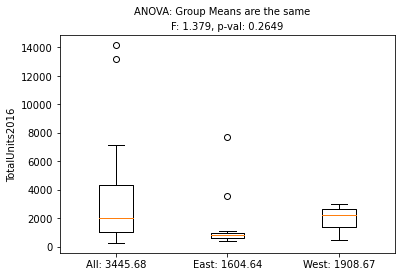

Ho: The group means are equal
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
   All   East -1841.0436 0.2666 -4685.0697 1002.9825  False
   All   West -1537.0133 0.7015 -6339.8416  3265.815  False
  East   West   304.0303    0.9 -4815.8018 5423.8625  False
-----------------------------------------------------------


/Users/cervavi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


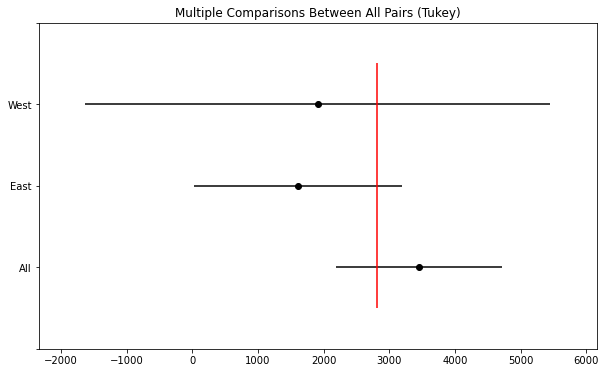

In [68]:
def Q1():
    print(final['TotalUnits2016'].groupby(final['Location']).mean())
    print()
    st.MeansTest(final, 'Location', 'TotalUnits2016')
Q1()

**Conclusion:** 
According to the ANOVA Test, the grooup means are equal given the difference between them is not statistically significant. However, chain restaurants located all over the U.S. or only in the eastern region contain outliers that may have skewed the data. 

**Question 2:** 
On average, which general location has the largest total units from chain restaurants?

Breakfast
N    1860.62069
Y    5556.10000
Name: TotalUnits2016, dtype: float64

The groups are Y and N

This is a test of equal variances with Ho: The variances are equal
The t test statistic is 17.797 and the p-value is 0.0
Conclusion: Reject Ho: The variances are not equal

This is a Welch (unequal variances) Two-Sample t test of equal means with Ho: The group means are equal
The t test statistic is 2.331 and the p-value is 0.0425
Conclusion: Reject Ho: The means are not equal


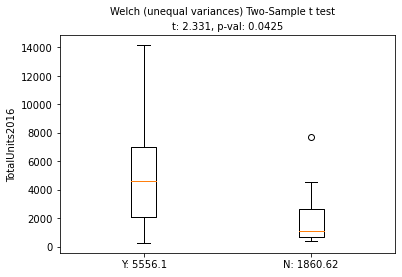

In [70]:
def Q2():
    print(final['TotalUnits2016'].groupby(final['Breakfast']).mean())
    print()
    st.MeansTest(final, 'Breakfast', 'TotalUnits2016')
Q2()

**Conclusion:** 
According to the Two Sample-Test, the means of 2016 sales from chain restaurants that serve breakfast options are not equal (Yes: 9809.7, No: 1917.5). In other words, chain restaurants that serve breakfast options are more likely to have more total units than chain restaurants that don't. 

**Question 3:** 
Which type of restaurant has the largest mean of total units?

Type
Casual Dining    1819.933333
Dessert          1896.666667
Fast Food        3855.733333
Sandwhich        3115.666667
Name: TotalUnits2016, dtype: float64

The groups are Fast Food and Sandwhich and Casual Dining and Dessert
This is a test of equal means with Ho: The means of all groups are equal/Ha: At least one group mean is different
The F test statistic is 1.087 and the p-value is 0.3674
Conclusion: Fail to Reject Ho: We can't reject that the means are the same


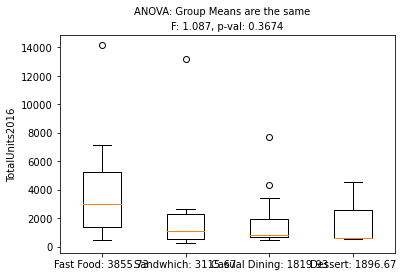

Ho: The group means are equal
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1      group2   meandiff p-adj    lower      upper   reject
--------------------------------------------------------------------
Casual Dining   Dessert   76.7333    0.9 -5444.5826 5598.0493  False
Casual Dining Fast Food    2035.8 0.3278 -1151.9333 5223.5333  False
Casual Dining Sandwhich 1295.7333 0.8224 -2921.2414 5512.7081  False
      Dessert Fast Food 1959.0667 0.7516 -3562.2493 7480.3826  False
      Dessert Sandwhich    1219.0    0.9 -4954.0189 7392.0189  False
    Fast Food Sandwhich -740.0667    0.9 -4957.0414 3476.9081  False
--------------------------------------------------------------------


/Users/cervavi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


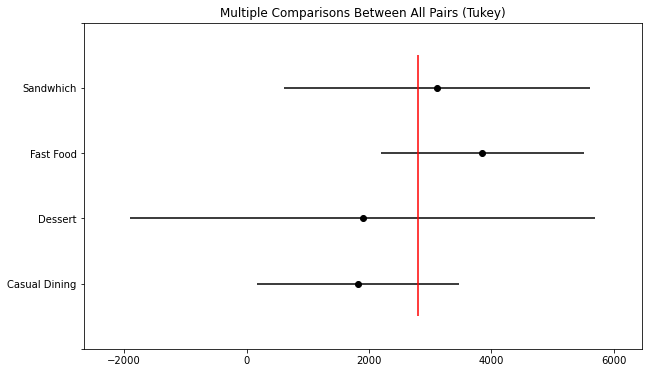

In [74]:
def Q3():
    print(final['TotalUnits2016'].groupby(final['Type']).mean())
    print()
    st.MeansTest(final, 'Type', 'TotalUnits2016')
Q3()

**Conclusion:** According to the ANOVA Test, the group means are equal given the difference between them is not statistically significant. However, Fast Food, Sandwhich and Casual Dining all have outliers to them which could've have skewed the results. Additionally, the values for Fast Food appear to be more spread out in comparison to the other types which have a more concentrated spread. 

### **Overall Conclusion:**
##### From the hypothesis tests, 2/3 the conclusion fail to reject the null hypothesis. The test that concluded to reject the null examined the total units of chain restaurants from 2016 based on whether breakfast options were offered. The two test that accepted the null examined the total units of the chain restaurants based on location and type, respectively. As a result, Breakfast options is not an indicator or significant enough to consider the average number of restaurant chains; however, location and type are for this data set. 

### **Menu:**

In [147]:
def menu(final):
    quit = False 
    while quit == False:
        print("\nMENU")
        print("1. Answer Question 1: What type of chains return the most sales?")
        print("2. Answer Question 2: On average, which general location has the largest return of sales?")
        print("3. Answer Question 3: Which type of restaurant has the largest mean of total units?")
        print("4. Output a T-Test")
        print("5. Output a Bar Graph")
        print("6. Output to Excel")
        print("7. Output Regression Model")
        print("8. Quit")
        menu_choice = int(input("Enter your choice:"))
        if menu_choice not in [1, 2, 3, 4, 5, 6, 7, 8]:
            print("Please enter a number.")
        else:
            if menu_choice == 1:
                print("\nAnswer Question 1: What type of chains return the most sales?")
                print(Q1())
            if menu_choice == 2:
                print("\nAnswer Question 2: On average, which general location has the largest return of sales?")
                print(Q2())
            if menu_choice == 3:
                print("\nAnswer Question 3: Which type of restaurant has the largest mean of total units?")
                print(Q3())
            if menu_choice == 4:
                print("\nT-Test")
                print("\nThis is a T-Test of your choice variable grouped by Breakfast")
                print("\nColumns:")
                print(final.dtypes == np.int64)
                bc = input("Choose a column name that is True: ")
                print(final[bc].groupby(final['Breakfast']).mean())
                print()
                st.MeansTest(final, 'Breakfast', bc)
            if menu_choice == 5:
                print("\nBar Graph")
                print("\nColumns:")
                print(final.dtypes)
                bx = input("Enter a listed column that is an object as the x variable: ")
                by = input("Enter a listed column that is a float64 or int64 as the y variable: ")
                plt.bar(final[bx], final[by])
                plt.title(f"{by} by {bx}")
                plt.xlabel(bx)
                plt.ylabel(by)
                plt.show()
            if menu_choice == 6:
                print("\nOutputs columns: Name, sales2016, Breakfast, Location, and Type to Excel File ResData")
                final.to_excel(r'ResData.xlsx', sheet_name = 'DataPart', columns = ['Name', 'sales2016', 'Breakfast', 'Location', 'Type'])
            if menu_choice == 7:
                print("\nRegressioon Model: ")
                print("\nColumns:")
                print(final.dtypes)
                print("\nChoose 2 Columns")
                c1 = input("Choose a column listed that is an int64 or float64 as the x variable")
                c2 = input("Choose a column listed that is an int64 or float64 as the y variable")
                xv = final[c1]
                yv = final[c2]
                model = ols("yv ~ xv", data=final).fit()
                print(model.summary())
            if menu_choice == 8:
                quit = True
menu(final)


MENU
1. Answer Question 1: What type of chains return the most sales?
2. Answer Question 2: On average, which general location has the largest return of sales?
3. Answer Question 3: Which type of restaurant has the largest mean of total units?
4. Output a T-Test
5. Output a Bar Graph
6. Output to Excel
7. Output Regression Model
8. Quit


Enter your choice: 8
